In [84]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float64)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

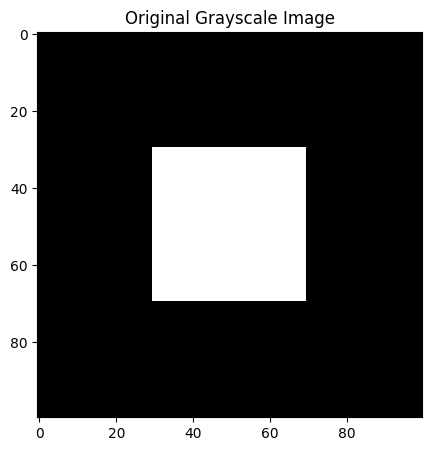

In [97]:
# Create a synthetic grayscale image (simple gradient for visualization)
# image = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))

# image = np.zeros((20, 20))
# image[:,10] = 255
# image[10, :] = 255


image = np.zeros((100, 100), dtype=np.uint8)
image[30:70, 30:70] = 255

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.show()

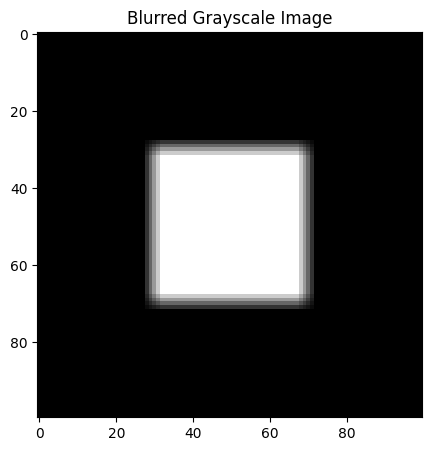

In [98]:
# Define the averaging kernel (3x3)
avg_kernel = np.ones((5,5)) / 9

smooth_img = convolve2d(image, avg_kernel)
# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(smooth_img, cmap='gray')
plt.title("Blurred Grayscale Image")
plt.show()

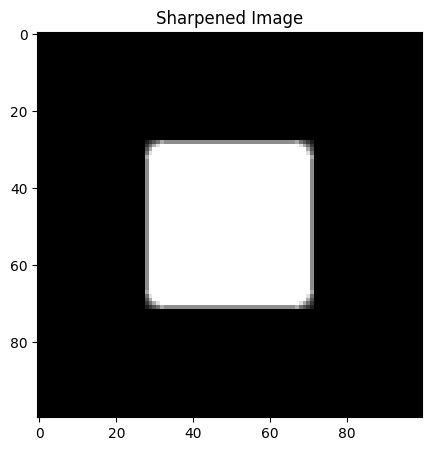

In [99]:
# Define the sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply convolution with the sharpening filter
sharpened = convolve2d(smooth_img, sharpen_kernel)
# Clip values to be in 0-255 and convert to uint8
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.show()

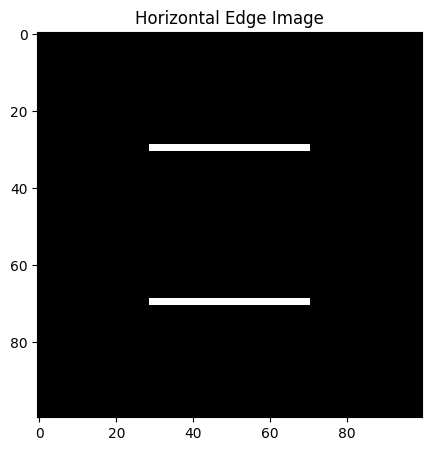

In [100]:
sobel_horizontal = np.array([[-1, -2, -1],
                             [ 0,  0,  0],
                             [ 1,  2,  1]])
# Apply convolution with the sharpening filter
edged_img = convolve2d(image, sobel_horizontal)
# print(sharpened)
# Clip values to be in 0-255 and convert to uint8
edges = np.clip(np.abs(edged_img), 0, 255).astype(np.uint8)


plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title("Horizontal Edge Image")
plt.show()

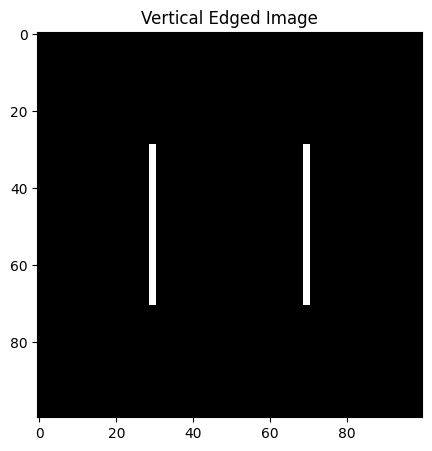

In [101]:
sobel_vertical = np.array([  [-1,  0,  1],
                             [-2,  0,  2],
                             [-1,  0,  1]])
# Apply convolution with the sharpening filter
edged_v = convolve2d(image, sobel_vertical)
# print(sharpened)
# Clip values to be in 0-255 and convert to uint8
edged_v = np.clip(np.abs(edged_v), 0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(edged_v, cmap='gray')
plt.title("Vertical Edged Image")
plt.show()